<a href="https://colab.research.google.com/github/sabinthapa100/Quantum_Computing/blob/main/Weekly_Series_Hands_on_QC_Tutorial_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Quantum Computing - I

# What is a Quantum Computer?

A quantum computer is a type of computer that uses quantum mechanics to perform operations on data. Unlike classical computers, which store and manipulate information as binary digits (bits: 0 or 1), quantum computers use quantum bits (qubits) that can exist in multiple states at the same time, allowing them to perform certain calculations much faster than classical computers.


## What powers quantum computers?

1.   Interference
2.   Superposition
3.   Entanglement

# Quantum Stacks

1. Qubits

2. Quantum gates

3. Quantum Circuits

4. Quantum Algorithms and Protocols

5. Applications

### What is a Qubit?
Qubit is the quantum version of classical bit.

Qubit is a two-level quantum systems that can encode information.

Generally, we take +z-axis as the |0> state, and negative z-axis (-z) as |1> state.

Here, {|0>, |1>} forms basis! 

So, 

|0> = 1. |0> + 0. |1> = $\begin{pmatrix}  1 \\   0 \end{pmatrix} $.

|1> = 0. |0> + 1. |1> = $\begin{pmatrix}  0 \\   1 \end{pmatrix} $.


The other two states(superposition states) along +x and -x are:

|+> = $ \frac{1}{\sqrt{2}} |0> +  \frac{1}{\sqrt{2}} |1>  = \frac{1}{\sqrt{2}} \begin{pmatrix}  1 \\   1 \end{pmatrix} $ 

and 

|->  = $ \frac{1}{\sqrt{2}} |0> -  \frac{1}{\sqrt{2}} |1> = \frac{1}{\sqrt{2}} \begin{pmatrix}  1 \\    - 1 \end{pmatrix} $.

By applying rotations [quantum gates / matrices] in the quantum states, we can obtain other states (valid by Born's Rule) - Bloch Sphere makes the life easy.

Hilbert space could form basis in different way than what we normally know from cartesian.

# Quantum Gates

In quantum computing and specifically the quantum circuit model of computation, a quantum logic gate (or simply quantum gate) is a basic quantum circuit operating on a small number of qubits. They are the building blocks of quantum circuits, like classical logic gates (NAND, NOR) are for conventional digital circuits.

The common quantum gates are:
1. X-Gate (Bit flip gate ~ NOT) =  $\begin{bmatrix} 0 & 1 \\[0.3em] 1 & 0 \end{bmatrix} $ 
Here, if you want to apply X-Gate to this qubit (0th qubit as we only have single qubit), you can simply do:

qc.x(0)

**Note: qc.x(#index_of_qubit)!**

So, what do we get?
After applying X-Gate to the 0th qubit, it goes from |0> to |1> state. We can predict this using matrix multiplication:

X |0> = |1>,

that is,

$\begin{bmatrix} 0 & 1 \\[0.3em] 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\[0.3em]  0 \end{bmatrix} = \begin{bmatrix} 0 \\[0.3em] 1 \end{bmatrix}$,
and so on!



2. Z-Gate (Phase flip Gate)  = $\begin{bmatrix} 1 & 0 \\[0.3em] 0 & -1 \end{bmatrix} $ 


Here, **qc[0] means that the qubit is the 0th qubit, note that indexing of qubits/classical-bits start from 0**.

3. H-Gate (Hadamard Gate) = $\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\[0.3em] 1 & -1 \end{bmatrix} $ 
We can obtain superposition if we apply H gate to a qubit.

If we apply H gate to |0> state, we get |+> superposition state.
If we apply H gate to |1> state, we get |-> superposition state.

4. CNOT-Gate (Controlled NOT gate) = $\begin{bmatrix} 1 & 0 & 0 & 0 \\[0.3em] 0 & 1 & 0 & 0 \\[0.3em] 0 & 0 & 0 & 1 \\[0.3em] 0 & 0 & 1 & 0 \end{bmatrix} $.
It acts on two qubits: first being the control and second being the target like,
 CNOT(q0,q1) => q1 is controlled by q0 such that q1 undergoes bit-flip if q0 is 1, i.e. if q0 is in 0th state, q1 doesnot change. Here, q0 DOESNOT undergo any changes!




**Note: The qubits are generally initialized at |0> state**.



# Tutorial 1:

1. Create Online Account in Google Colab or IBM Quantum Computing.

2. You can create jupyter notebook in those platforms, and also upload the notebooks!

3. For now, upload the **"Weekly Series - Hands-on QC Tutorial-I.ipynb"** into any of those platforms (choose the good one! - based on your device, internet and interest).

Now, let's start going through the tutorial, doing the work in real time!



## Importing all the libraries 

(no need to memorize!)
(you can review it later!)

In [2]:
#Let's import all the libraries needed for this talk

#install qiskit 
!pip install qiskit

#from qiskit, import all the needed libraries
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

from qiskit.visualization import visualize_transition # We will use this function to run our circuit and visualize its final state

import warnings  # We are using this library to suppress some warning messages
warnings.filterwarnings("ignore")

from numpy.random import randint
from random import random
import matplotlib.pyplot as plt
import math

print("Libraries Imported Successfully!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.4 MB/s eta 0:00:00


## Creating Simple Circuits using Qiskit

### How to initialize a quantum circuit?

In [1]:
qc = QuantumCircuit(1) #you take one qubit initialized at 0th state

#QuantumCircuit function takes one or two arguments, first being number of qubits
# and 
#second being number of classical bits (if measurement is required!): example:
# qc = QuantumCircuit(2,2) #2 qubit, 2 classical bit quantum circuit 
#(saved in variable qc)

NameError: ignored

**Question #1**
Create a quantum circuit with 3 qubits and 1 classical bit.

In [ ]:
qc = QuantumCircuit(3,1)


**Question #2**
Create a quantum circuit with 2 qubits and 0 classical bit.

In [ ]:
qc = QuantumCircuit(2)

## How to apply gates to a quantum circuit?

If your circuit is 'qc', you want to apply 'x' gate, then:

qc.x(0) #0 is the index of the qubit

### Apply X gate

In [ ]:
qc = QuantumCircuit(1) #only one qubit: it's zeroth qubit
qc.x(0) #x gate applied to 0th qubit

**Question #3**
Create a quantum circuit with 3 qubits and no classical bit, and then apply X gate to 0th qubit and 1st qubit.

In [ ]:
qc = QuantumCircuit(3)
qc.x(0)
qc.x(1)

### Apply H gate

In [ ]:
qc = QuantumCircuit(2) #two qubits: 0 classical bits
qc.h(1) #x gate applied to 1st qubit

**Question #4**
Create a quantum circuit with 3 qubits and no classical bit, and then apply X gate to 0th qubit and H gate to 1st qubit.

In [ ]:
qc = QuantumCircuit(3)
qc.x(0)
qc.h(1)
qc.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ H ├
     └───┘
q_2: ─────

### Apply Z gate

In [ ]:
qc = QuantumCircuit(1) #only one qubit: it's zeroth qubit
qc.z(0) #x gate applied to 0th qubit

**Question #5**
Create a quantum circuit with 3 qubits and 1 classical bit, and then apply X gate to 0th qubit and H gate to 1st qubit, and Z gate to the 2nd qubit. 

In [ ]:
qc = QuantumCircuit(3,1)
qc.x(0)
qc.h(1)
qc.z(2)


**Question #6**
Create a quantum circuit with 3 qubits and 1 classical bit, and then apply X gate to 0th qubit and then apply H gate to it, and finally apply Z gate to the outcome. 

In [ ]:
#write your code

### Apply CNOT gate
(acts on two qubits)

In [ ]:
qc = QuantumCircuit(2) #two qubits
qc.cx(0,1) #cx gate applied (0th qubit is the control, 1st qubit is the target)
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [ ]:
qc = QuantumCircuit(2) #two qubits
qc.cx(1,0) #cx gate applied (1st qubit is the control, 0th qubit is the target)
qc.draw()

┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

**Question #7**
Create a quantum circuit with 3 qubits and 1 classical bit, and then apply CNOT gate such that 2nd qubit is the control qubit and 1st qubit is the target qubit.

In [ ]:
#write your code here

**Question #8**
Create a quantum circuit with 3 qubits and 1 classical bit, and then apply CNOT gate such that 3rd qubit is the control qubit and 0th qubit is the target qubit.

In [ ]:
#write your code here

**Question #9**
Create a quantum circuit with 3 qubits and 1 classical bit, and then apply X gate to the 0th qubit, and then apply CNOT gate such that 0th qubit is the control and 1st qubit is the target.

In [ ]:
#write your code here

### How to draw Quantum Circuit?

In [ ]:
qc = QuantumCircuit(1)
qc.draw() #this draws the circuit

q:

In [ ]:
qc = QuantumCircuit(1)
qc.x(0) #x gate applied to 0th qubit
qc.draw() #this draws the circuit

┌───┐
q: ┤ X ├
   └───┘

In [ ]:
qc = QuantumCircuit(2)
qc.x(0) #x gate applied to 0th qubit
qc.cx(0,1) #apply CNOT gate, 0th is control, 1st is target.
qc.draw() #this draws the circuit

┌───┐     
q_0: ┤ X ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

**Question #10**
Create a 3 qubit circuit with 1 classical bit, then apply x gate to 0th qubit, H gate to it and finally apply CNOT gate such that 0th qubit is the control and 2nd qubit is the target. Finally, create the circuit

In [ ]:
#write your code

### How to measure the outcome in quantum circuit?
We need a classical bit to store the measurement reasult in quantum circuit!!
The measurement is done with QuantumCircuit().measure() function. \\
It's done like:
qc.measure(0,0) #0th qubit, 0th cbit \\
or \\
qc.measure([0,1],[0,1]) #qubits (0th and 1st), cbits (2 classical bits)which is equivalent to:
qc.measure(0,0)
qc.measure(1,1).

Check this [link](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html) for detail.

**NOTE** that qc.measure_all() creates its own classical bits to store the measurement results in.

In [ ]:
qc = QuantumCircuit(1, 1) #quantum circuit with 1 qubit and 1 classical bit

qc.h(0) #H gate to 0th
qc.measure(0,0)
qc.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [ ]:
qc = QuantumCircuit(2, 2) #quantum circuit with 2 qubits and 2 classical bits

qc.h(0) #H gate to 0th
qc.cx(0, 1) #CX from 0 to 1

qc.measure([0, 1], [0, 1]) #measure the output

qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [ ]:
qc = QuantumCircuit(3, 2) #quantum circuit with 2 qubits and 2 classical bits

qc.h(0) #H gate to 0th
qc.cx(1, 2) #CX from 0 to 1

qc.measure(0,0) 
qc.measure(1,1) 
qc.measure(0,1)

qc.draw()

┌───┐┌─┐   ┌─┐
q_0: ┤ H ├┤M├───┤M├
     └───┘└╥┘┌─┐└╥┘
q_1: ──■───╫─┤M├─╫─
     ┌─┴─┐ ║ └╥┘ ║ 
q_2: ┤ X ├─╫──╫──╫─
     └───┘ ║  ║  ║ 
c: 2/══════╩══╩══╩═
           0  1  1

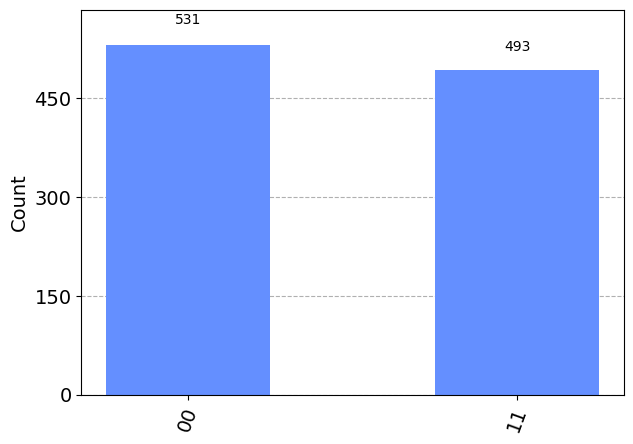

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)

results = job.result()
plot_histogram(results.get_counts(qc))

**Question #11** Create a 3 qubit and 3 classical bit quantum circuit where you apply an X gate to all 3 qubits and then measure them all (DO NOT USE measur_all() here). Then draw this circuit.


In [ ]:
#write your code here

**Question #12** Create a 3 qubit and 3 classical bit quantum circuit where you apply an X gate to all 3 qubits and then measure them all. Then draw this circuit.


In [ ]:
#write your code here

**Question #13** Create a 3 qubit and 3 classical bit quantum circuit where you apply an X gate to all 3 qubits and then measure them all using measure_all() function. Then draw this circuit.


In [ ]:
qc = # COMPLETE THIS LINE

qc.x([0, 1, 2])

qc.measure# COMPLETE THIS LINE

qc.draw()

SyntaxError: ignored

### See the output

We can see the output of the quantum circuit using following code.

In [ ]:
qc = QuantumCircuit(2, 2) #quantum circuit with 2 qubits and 2 classical bits

qc.h(0) #H gate to 0th
qc.cx(0, 1) #CX from 0 to 1

qc.measure(0,0) 
qc.measure(1,1) 

qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

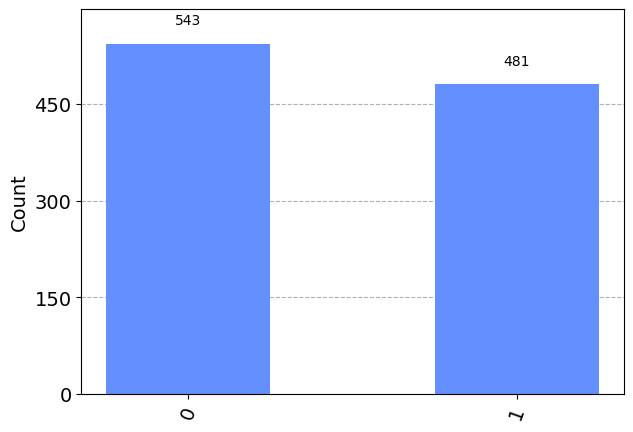

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)

results = job.result()
plot_histogram(results.get_counts(qc))

**Question #14**
Re-do questions 9, 10, 11, 12, 13 to visualize the output results!

In [ ]:
#question 9 #write your code

In [ ]:
#question 10  #write your code

In [ ]:
#question 11  #write your code

In [ ]:
#question 12  #write your code

In [ ]:
#question 13 #write your code

### See State Vectors  in different formats: text, latex and in Bloch Sphere

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)

#store the state vector of the qubit in the variable state0
state0 = Statevector.from_instruction(qc) 

#draw the vector representation of the state in different formats

#in text format
state0.draw('text')

[0.70710678+0.j,0.70710678+0.j]

In [ ]:
#in latex format
state0.draw('latex')

<IPython.core.display.Latex object>

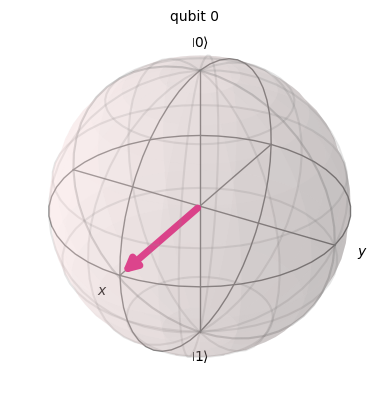

In [ ]:
#in Bloch Sphere representation of the state
state0.draw('bloch')

In [ ]:
#measure the state vector
state0.measure()

('0',
 Statevector([1.+0.j, 0.+0.j],
             dims=(2,)))

### Visualize Transition

To see how a qubits undergo changes in the Bloch Sphere, we can use visualize_transition() function builtin Qiskit. See more [here](https://qiskit.org/documentation/stubs/qiskit.visualization.visualize_transition.html), and [here](https://qiskit.org/documentation/apidoc/visualization.html/).

In [ ]:
# Circuit
qc = QuantumCircuit(1) #1 qubit and no classical bit

qc.x(0)
qc.h(0)

qc.h(0)
qc.x(0)

qc.draw()

visualize_transition(qc, trace = True)

**Question#15**
Create and draw a 3-qubit/1-classical bit circuit. Then apply X gate to the 0th qubit, then H gate to it, and apply CX gate (0 control, 1 target). Then draw circuit, do measurement, see the output measurement and visualize the transition.

In [ ]:
#your code

In [ ]:
# Simulate using QASM
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)  # Make sure you change "qc" to the name of your quantum circuit in this line!
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
#your code


**Question#16**
Create and draw a 2-qubit/2-classical bit circuit in which you apply the gates listed below and measure the qubits. Run the simulator code below to see what measurements results you get.

**Gates (in the order listed)**:

**Z on qubit 0**

**H on qubit 0**

**H on qubit 1**

In [ ]:
#your code    

In [ ]:
#your code

### Exercises


**Hw#1**, create a 5 qubit/0 classical bit circuit in which qubits 0 - 2 are put in the $| + \rangle$ state and qubits 3 - 4 are put into the $| - \rangle$ state and then measured. Run the provided code below to simulate the circuit and verify that you have coded this correctly.


In [ ]:
#write your code here

In [ ]:
# Simulate using QASM
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)  # Make sure you change "qc" to the name of your quantum circuit in this line!
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

**Hw#2**
Create and draw a 2-qubit/2-classical bit circuit with gates applied as described below. Measure both bits in the end and simulate the results using the provided code. Then run the simulation using QASM.

**Gates**:

H on qubit 0

CX with qubit 0 as the control and qubit 1 as the target

CX with qubit 1 as the control and qubit 0 as the target

In [ ]:
#write your code

Run the simulation using this:

In [ ]:
# Simulate using QASM
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)  # Make sure you change "qc" to the name of your quantum circuit in this line!
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

**Hw#3** Create and draw a 2-qubit/2-classical bit circuit with gates applied as described below. Measure both bits in the end and simulate the results using the provided code.

**Gates**:

H on qubit 0

H on qubit 1

CX with qubit 0 as the control and qubit 1 as the target

H on qubit 0

H on qubit 1

In [ ]:
#your code

Then run the simulation below using QASM.

In [ ]:
# Simulate using QASM
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)  # Make sure you change "qc" to the name of your quantum circuit in this line!
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

***Challenge#1**
Create and draw a 5-qubit/2-classical bit quantum circuit where we apply gates as follows:

Using a loop, apply H to all qubits if `superposition` is `True` and X otherwise.

Then, if the variable `what_next` is the string "Z", apply a Z gate to every qubit using a loop.

Also, run the code for different values of the variable to see this in action.

In [ ]:
#your code goes here


---
© qubitnepal.com, All rights reserved.